In [1]:
# import python libraries
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# get the data
georges_df = pd.read_csv("updated_georges.csv")
non_georges_df = pd.read_csv("updated_non_georges.csv")

In [3]:
# labeling the data
georges_df['label'] = 1
non_georges_df['label'] = 0

In [4]:
# concat and suffling the data
data = pd.concat([georges_df, non_georges_df], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
# check there is any Null value is present or not
data.isnull().sum()

image_path    0
label         0
dtype: int64

In [6]:
# Split into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['image_path'], data['label'], test_size=0.2, random_state=42)

In [7]:
# Function to extract color histogram features
def extract_color_histogram(img_path, bins=(8, 8, 8)):
    img = cv2.imread(img_path)
    hist = cv2.calcHist([img], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [8]:
# Extract features for all images
train_features = np.array([extract_color_histogram(img) for img in train_data])
test_features = np.array([extract_color_histogram(img) for img in test_data])

In [9]:
# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
knn_predictions = knn.predict(test_features)
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_report = classification_report(test_labels, knn_predictions)
print("KNN Classifier:")
print(f"Accuracy: {knn_accuracy}")
print("Classification Report:\n", knn_report)

KNN Classifier:
Accuracy: 0.6966942148760331
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74       687
           1       0.66      0.63      0.64       523

    accuracy                           0.70      1210
   macro avg       0.69      0.69      0.69      1210
weighted avg       0.70      0.70      0.70      1210



In [10]:
# Support Vector Machine (SVM) Classifier
svm = SVC(kernel='linear')
svm.fit(train_features, train_labels)
svm_predictions = svm.predict(test_features)
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_report = classification_report(test_labels, svm_predictions)
print("\nSupport Vector Machine (SVM) Classifier:")
print(f"Accuracy: {svm_accuracy}")
print("Classification Report:\n", svm_report)


Support Vector Machine (SVM) Classifier:
Accuracy: 0.6917355371900826
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.85      0.76       687
           1       0.71      0.48      0.57       523

    accuracy                           0.69      1210
   macro avg       0.70      0.67      0.67      1210
weighted avg       0.70      0.69      0.68      1210



In [11]:
# Support Vector Machine (SVM) Classifier
svm = SVC(kernel='poly')
svm.fit(train_features, train_labels)
svm_predictions = svm.predict(test_features)
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_report = classification_report(test_labels, svm_predictions)
print("\nSupport Vector Machine (SVM) Classifier:")
print(f"Accuracy: {svm_accuracy}")
print("Classification Report:\n", svm_report)


Support Vector Machine (SVM) Classifier:
Accuracy: 0.7173553719008264
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77       687
           1       0.71      0.58      0.64       523

    accuracy                           0.72      1210
   macro avg       0.72      0.70      0.70      1210
weighted avg       0.72      0.72      0.71      1210



In [12]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)
rf_predictions = rf.predict(test_features)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
rf_report = classification_report(test_labels, rf_predictions)
print("\nRandom Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:\n", rf_report)


Random Forest Classifier:
Accuracy: 0.775206611570248
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       687
           1       0.78      0.67      0.72       523

    accuracy                           0.78      1210
   macro avg       0.78      0.76      0.77      1210
weighted avg       0.78      0.78      0.77      1210



In [13]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(train_features, train_labels)
dt_predictions = dt.predict(test_features)
dt_accuracy = accuracy_score(test_labels, dt_predictions)
dt_report = classification_report(test_labels, dt_predictions)
print("\nDecision Tree Classifier:")
print(f"Accuracy: {dt_accuracy}")
print("Classification Report:\n", dt_report)


Decision Tree Classifier:
Accuracy: 0.6867768595041323
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       687
           1       0.62      0.69      0.66       523

    accuracy                           0.69      1210
   macro avg       0.68      0.69      0.68      1210
weighted avg       0.69      0.69      0.69      1210



In [14]:
# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(train_features, train_labels)
nb_predictions = nb.predict(test_features)
nb_accuracy = accuracy_score(test_labels, nb_predictions)
nb_report = classification_report(test_labels, nb_predictions)
print("\nNaive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy}")
print("Classification Report:\n", nb_report)


Naive Bayes Classifier:
Accuracy: 0.6247933884297521
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.91      0.73       687
           1       0.68      0.25      0.37       523

    accuracy                           0.62      1210
   macro avg       0.65      0.58      0.55      1210
weighted avg       0.64      0.62      0.58      1210



In [15]:
# Logistic Regression Classifier
lr = LogisticRegression(random_state=42)
lr.fit(train_features, train_labels)
lr_predictions = lr.predict(test_features)
lr_accuracy = accuracy_score(test_labels, lr_predictions)
lr_report = classification_report(test_labels, lr_predictions)
print("\nLogistic Regression Classifier:")
print(f"Accuracy: {lr_accuracy}")
print("Classification Report:\n", lr_report)


Logistic Regression Classifier:
Accuracy: 0.6950413223140496
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75       687
           1       0.69      0.54      0.60       523

    accuracy                           0.70      1210
   macro avg       0.69      0.68      0.68      1210
weighted avg       0.69      0.70      0.69      1210



In [16]:
# This Function is use to classify a new image using Random Forest
def classify_image_rf(img_path, model):
    img_feature = extract_color_histogram(img_path)
    img_feature = np.array([img_feature])
    prediction = model.predict(img_feature)
    return "St. George" if prediction == 1 else "Not St. George"

# Example
new_image_path = "george_test_task/george/00a8418680f015900aa9ee6eea4c762f.jpg"
result_rf = classify_image_rf(new_image_path, rf)
print(f"The image is classified as: {result_rf}")


The image is classified as: St. George


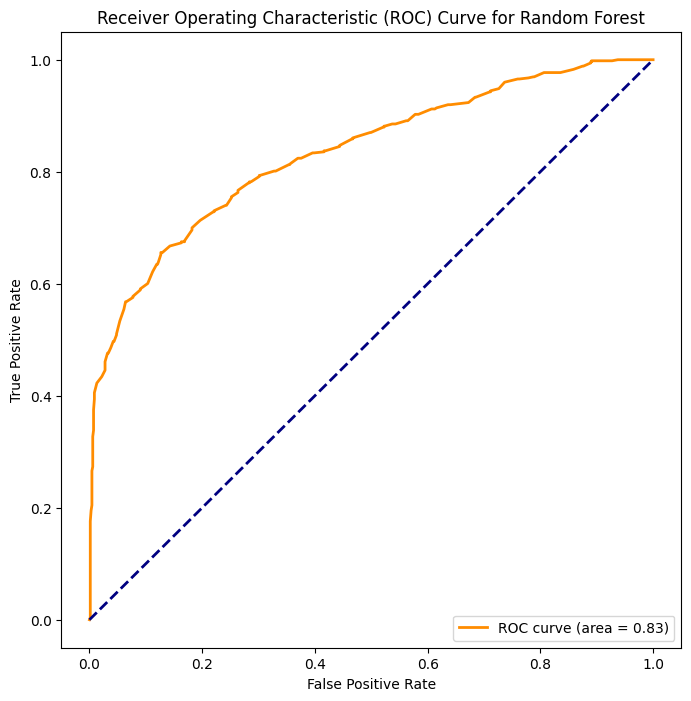

In [17]:
# Predict probabilities for the positive class
rf_probs = rf.predict_proba(test_features)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(test_labels, rf_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()